# Predicting Student Admissions with Neural Networks in Keras

this notebook predicts student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)(0-800)
- GPA Scores (Grades)(0-4)
- Class rank (1-4)

In [1]:

import pandas as pd
import numpy as np
from pandas import DataFrame
data = pd.read_csv('student_data.csv')

df = DataFrame(data,columns=['admit','gre','gpa','rank'])
data[:10]


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


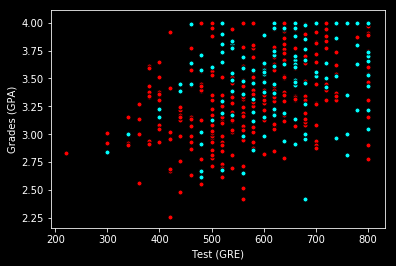

In [10]:
#DATA PLOTTING AND VISUALIZATION
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background')


def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    

plot_points(data)
plt.show()

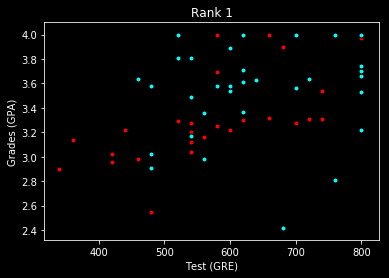

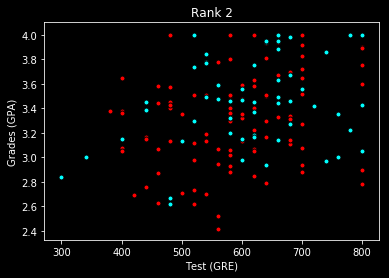

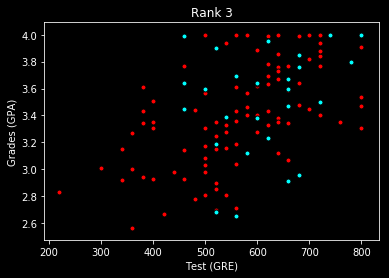

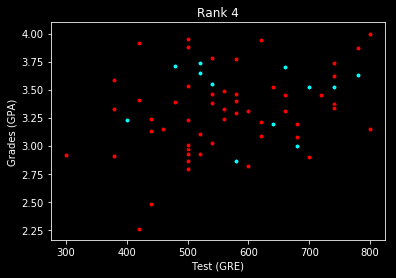

In [11]:
#DATA PLOTTING AND VISUALIZATION
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

In [4]:
#getting dummy variable for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [5]:
#data standardization
processed_data = one_hot_data[:]


processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [13]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])
import keras
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features[:10])
print(targets[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
278      1  0.850  0.7500       0       0       0       1
30       0  0.675  0.9450       0       0       0       1
397      0  0.575  0.6575       0       1       0       0
89       1  0.825  1.0000       0       1       0       0
373      1  0.775  0.8425       1       0       0       0
188      0  0.700  0.7675       0       1       0       0
295      0  0.650  0.8125       0       0       1       0
228      0  0.600  0.8575       0       1       0       0
195      0  0.700  0.8975       0       1       0       0
393      1  0.775  0.9375       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
7       0  0.500  0.7700       0       1       0       0
8       1  0.675  0.8475       0       0       1       0
14      1  0.875  1.0000       1       0       0       0
40      0  0.700  0.6050       0       1       0       0
52      0  

In [7]:
#MLP MODEL NEURAL NETWORK
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W1230 22:03:29.820031  1452 deprecation_wrapper.py:119] From C:\Users\RISHABH\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1230 22:03:29.851991  1452 deprecation_wrapper.py:119] From C:\Users\RISHABH\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1230 22:03:29.855994  1452 deprecation_wrapper.py:119] From C:\Users\RISHABH\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1230 22:03:29.879989  1452 deprecation_wrapper.py:119] From C:\Users\RISHABH\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1230 22:03:29.891973  1452 deprecatio

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Training the model
model.fit(features, targets, epochs=70, batch_size=100, verbose=1)

W1230 22:03:30.172784  1452 deprecation.py:323] From C:\Users\RISHABH\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/70
360/360 [==============================] - 0s 1ms/step - loss: 0.6822 - acc: 0.5667
Epoch 2/70
360/360 [==============================] - 0s 44us/step - loss: 0.6426 - acc: 0.6778
Epoch 3/70
360/360 [==============================] - 0s 44us/step - loss: 0.6276 - acc: 0.6722
Epoch 4/70
360/360 [==============================] - 0s 44us/step - loss: 0.6163 - acc: 0.6722
Epoch 5/70
360/360 [==============================] - 0s 44us/step - loss: 0.6114 - acc: 0.6722
Epoch 6/70
360/360 [==============================] - 0s 44us/step - loss: 0.6167 - acc: 0.6722
Epoch 7/70
360/360 [==============================] - 0s 44us/step - loss: 0.6168 - acc: 0.6722
Epoch 8/70
360/360 [==============================] - 0s 33us/step - loss: 0.6109 - acc: 0.6722
Epoch 9/70
360/360 [==============================] - 0s 44us/step - loss: 0.6082 - acc: 0.6806
Epoch 10/70
360/360 [==============================] - 0s 44us/step - loss: 0.6019 - acc: 0.6750
Epoch 11/70
360/360 [===================

In [9]:
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score[1]*100)
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1]*100)

360/360 [==============================] - 0s 244us/step

 Training Accuracy: 70.55555555555556
40/40 [==============================] - 0s 200us/step

 Testing Accuracy: 75.0
